<!-- Banner Image -->
<img src="https://uohmivykqgnnbiouffke.supabase.co/storage/v1/object/public/landingpage/brev-xmas-3.png" width="100%">

<!-- Links -->
<center>
  <a href="https://console.brev.dev" style="color: #06b6d4;">Console</a> •
  <a href="https://brev.dev" style="color: #06b6d4;">Docs</a> •
  <a href="/" style="color: #06b6d4;">Templates</a> •
  <a href="https://discord.gg/NVDyv7TUgJ" style="color: #06b6d4;">Discord</a>
</center>

# Run Oobabooga, the LLM WebUI 🤙

Welcome!

In this notebook, we will run the LLM WebUI, Oobabooga. This UI lets you play around with large language models / text generatation without needing any code!

### Help us make this tutorial better! Please provide feedback on the [Discord channel](https://discord.gg/T9bUNqMS8d) or on [X](https://x.com/harperscarroll).

A note about running Jupyter Notebooks: Press Shift + Enter to run a cell. A * in the left-hand cell box means the cell is running. A number means it has completed. If your Notebook is acting weird, you can interrupt a too-long process by interrupting the kernel (Kernel tab -> Interrupt Kernel) or even restarting the kernel (Kernel tab -> Restart Kernel). Note restarting the kernel will require you to run everything from the beginning.


## Let's begin!

I used a GPU from [brev.dev](https://brev.dev). I used an A10G, with 24GB GPU Memory, 16 GB RAM, 120 GB storage. This machine is about $1/hr. 

Click the badge below to get your preconfigured instance:

[![ Click here to deploy.](https://brev-assets.s3.us-west-1.amazonaws.com/nv-lb-dark.svg)](https://console.brev.dev/environment/new?instance=A10G:g5.xlarge&diskStorage=120&name=oobabooga&file=https://github.com/brevdev/notebooks/raw/main/oobabooga.ipynb&python=3.10&cuda=12.0.1)

Once you've checked out your machine and landed in your instance page, select the specs you'd like (I used **Python 3.10 and CUDA 12.0.1**; these should be preconfigured for you if you use the badge above) and click the "Build" button to build your verb container. Give this a few minutes.

A few minutes after your model has started Running, click the 'Notebook' button on the top right of your screen once it illuminates (you may need to refresh the screen). You will be taken to a Jupyter Lab environment, where you can upload this Notebook.

Note: You can connect your cloud credits (AWS or GCP) by clicking "Org: " on the top right, and in the panel that slides over, click "Connect AWS" or "Connect GCP" under "Connect your cloud" and follow the instructions linked to attach your credentials.

In [1]:
!git clone https://github.com/oobabooga/text-generation-webui.git

Cloning into 'text-generation-webui'...
remote: Enumerating objects: 14265, done.
remote: Counting objects: 100% (1716/1716), done.
remote: Compressing objects: 100% (261/261), done.
remote: Total 14265 (delta 1553), reused 1552 (delta 1455), pack-reused 12549
Receiving objects: 100% (14265/14265), 24.33 MiB | 61.06 MiB/s, done.
Resolving deltas: 100% (9879/9879), done.


In [2]:
import os
os.chdir('text-generation-webui')

In [3]:
!sudo apt-get update -y -q
!sudo apt-get install expect -y -q

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:6 https://ngrok-agent.s3.amazonaws.com buster InRelease
Fetched 110 kB in 0s (245 kB/s)
Reading package lists...
Reading package lists...
Building dependency tree...
Reading state information...
expect is already the newest version (5.45.4-2build1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [4]:
%%writefile oobabooga_start.expect
#!/usr/bin/expect

spawn ./start_linux.sh --share
expect "What is your GPU?"
send "A\r"
expect "Do you want to use CUDA 11.8 instead of 12.1?"  
send "N\r"
interact

Writing oobabooga_start.expect


### Run Oobabooga + Download Models

Run the code below to get a **public URL** for your Oobabooga session. Let it run until the output stops and you see something like this:

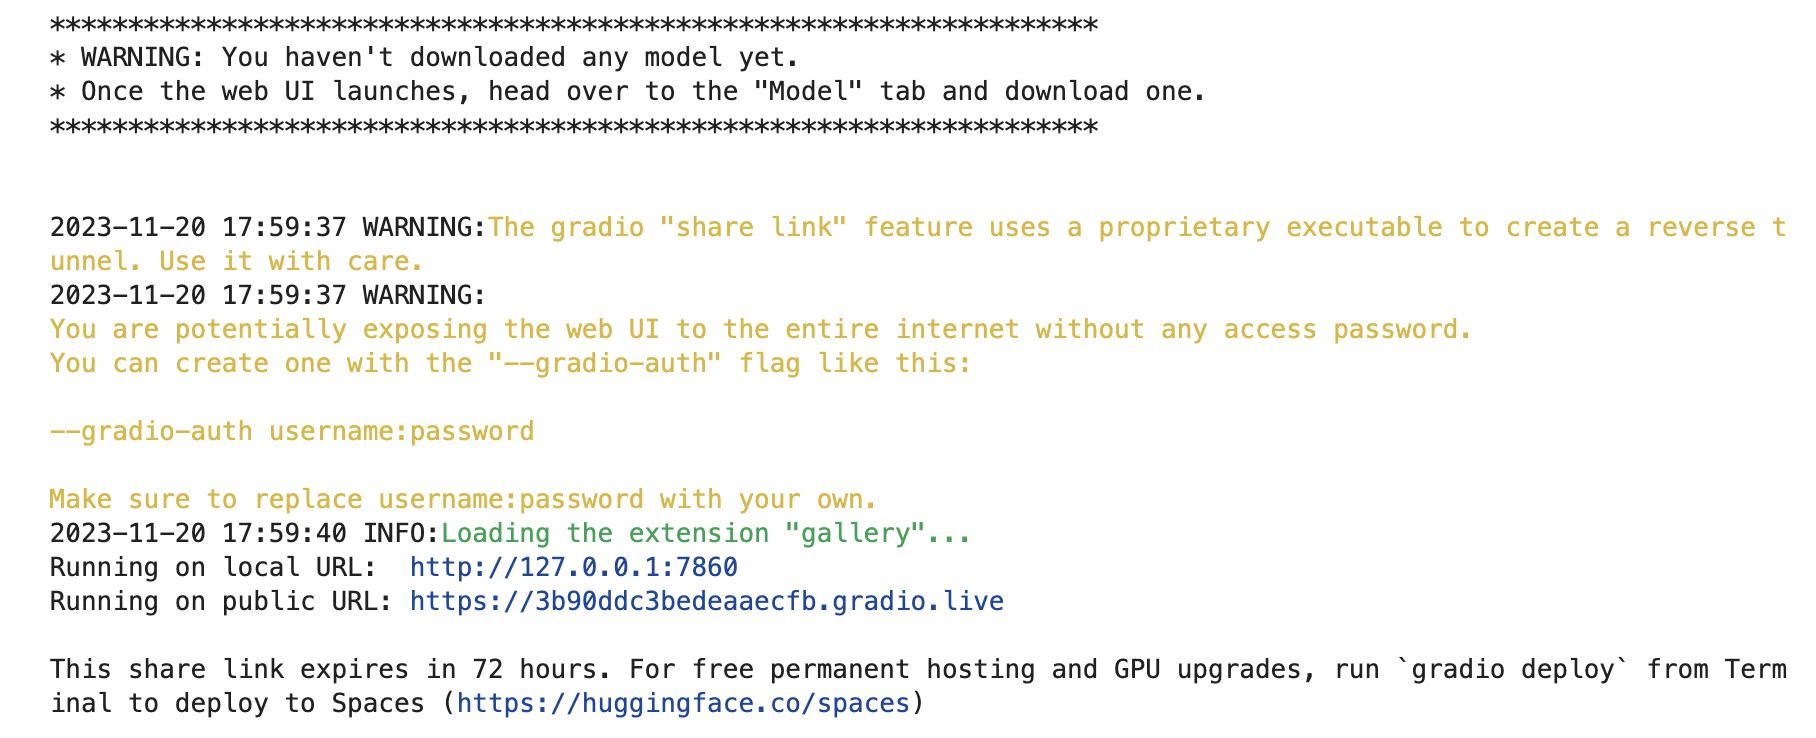

There is no more code after the code cell below, as the output will get long and hard to follow once you start working in Oobabooga. 

***If you prefer to not expose your session on a URL:*** remove the `--share` parameter from the `whisper_start.expect` file above and re-run the cell. Then, on a terminal on your LOCAL machine (i.e. NOT from within this machine/notebook, but on your laptop), run `brev port-forward oobabooga -p 7860:7860`. If you chose a different machine name, replace `oobabooga` with that name. Then, open a browser, and search `localhost:7860`; this should open to the Oobabooga UI.

#### To download a model, follow the steps here:

[![Download a Model to Oobabooga](https://cdn.loom.com/sessions/thumbnails/02da582d0ed34a19ab26cd3955acb6dc-with-play.gif)](https://www.loom.com/share/02da582d0ed34a19ab26cd3955acb6dc)

In [ ]:
!chmod +x oobabooga_start.expect
!sudo ./oobabooga_start.expect 